# Simulating a plant with time-dependent control actions

Todo: clean up descriptions and libraries

Assume that we have a plant with some simple dynamics described by this transfer function:

$$G(s) = \frac{1}{s^2 + 2s + 1}$$

We can define the system in `python-control` by doing:

In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G_s = control.tf([1.5],[1,0.5,1])
G_s


      1.5
---------------
s^2 + 0.5 s + 1

### Step Response: `control.step_response`
Here's how to get the step response and plot the output:

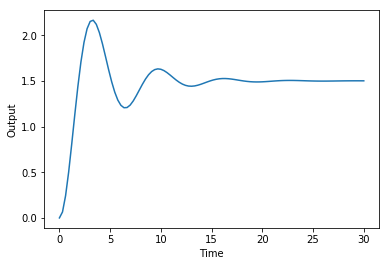

In [3]:
# Generate a step response
T = np.linspace(0,30,100)
t, yout = control.step_response(G_s,T)

# Plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,yout)

## Output with control actions: `control.forced_response`
What if we want to introduce the step at time $t=20$s? We can do this by using `control.forced_response` and feeding in an input vector, $u$ containing the control actions at each time step:

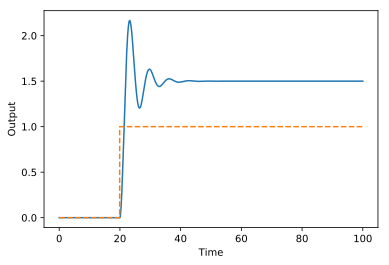

In [80]:
# Generate a step response
T = np.linspace(0,100,1000)

# Our input is all zero, until t=20
U = np.ones(len(T))
U[:200] = 0

t, yout, _ = control.forced_response(G_s, T, U)

# Plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,yout)
plt.step(t,U, linestyle='--') # We'll use `step` to create a staircase plot for the control actions

Here's the response with 2 control actions, one at $t=20$s and another one at $t=60$s:

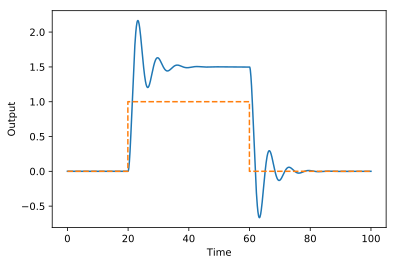

In [82]:
# Generate a step response
T = np.linspace(0,100,1000)

# Our input is one between t=20 and t=60
U = np.zeros(len(T))
U[200:600] = 1

t, yout, _ = control.forced_response(G_s, T, U)

# Plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,yout)
plt.step(t,U, linestyle='--')

## Animated outputs
Let's create some animations. 

In [96]:
# Start by importing our animation libraries
%config InlineBackend.figure_formats = {'svg',}
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from IPython.display import display
from matplotlib import animation
from IPython.display import HTML

In [217]:
# Generate a step response
T = np.linspace(0,20,100)

# Our input is one between t=15 and t=30
U = np.zeros(len(T))
U[10:50] = 1

# TF
G_s = control.tf([1.0],[0.5,0.5,1])

t, yout, _ = control.forced_response(G_s, T, U)

In [244]:
G_s


         1
-------------------
0.5 s^2 + 0.5 s + 1

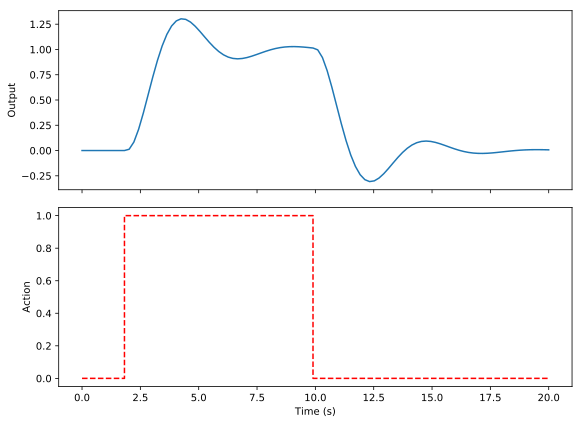

In [238]:
# Create sub plots
gs = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(8,6));
ax1 = plt.subplot(gs[0, 0]); # row 0, col 0
ax2 = plt.subplot(gs[1, 0],sharex=ax1); # row 1, col 0
plt.setp(ax1.get_xticklabels(), visible=False)
f.set_tight_layout('tight')
line1, = ax1.plot(t, yout, lw=1.5);
line2, = ax2.step(t, U, lw=1.5, linestyle='--', color='r');

ax1.set_ylabel('Output')
ax2.set_ylabel('Action')
ax2.set_xlabel('Time (s)')

# How many data points to skip for plotting
skip = 1

# The animation function. This is called sequentially, frame by frame, to create the animated plot.
def drawframe(n):
    line1.set_data(t[0:n*skip:skip], yout[0:n*skip:skip])
    line2.set_data(t[0:n*skip:skip], U[0:n*skip:skip])
    
    # Print out the current frame using "\r", the 'carriage return' character, as our end character.
    # This makes Python print the frame on the same line.
    print("Frame: {:0d}".format(n), end="\r")
    return (line1,line2)

In [239]:
# The `interval` parameter is the delay between frames in milliseconds and it controls the speed of the animation. 
anim = animation.FuncAnimation(f, drawframe, frames=round(len(t)/skip), interval=20)
HTML(anim.to_jshtml())

### We can also save the output as a .gif
http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

In [242]:
anim.save('animation.gif', writer='imagemagick', fps=60, dpi=100)

In [243]:
from IPython.display import Image
Image(url='animation.gif')